The goal of this project is to analyze a dataset to determine if there exists a connection between driving conditions and an electric vehicle’s battery temperature. The expected model contains two inputs: the ambient temperature and the trip distance, and the output is the battery temperature. The statistical method that will be considered for this analysis is linear regression and sampling will be applied to verify the conclusions drawn from the dataset

In [1]:
# Import necessary libraries = common libraries include pandas, numpy, matplotlib, sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import math
import statistics as stats
import statsmodels.stats.api as sms
%matplotlib inline

## **Data Cleaning and Preparation:**
1. import the data into a dataframe
2. review the data
3. determine the data set to only use for the model to be built on
4. use only the data asked in the question
5. confirm each column has all the data per column
6. if not all data in the column, make sample the data so that value count equal the other columns

In [2]:
#import data
evbattemp = pd.read_excel('EvBatTemps.xlsx')

In [3]:
#review the data
# view the first 5 records of each column
evbattemp.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Unnamed: 13,Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,NaN,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,NaN,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,NaN,"Automatic, Level 1",NaN


In [4]:
#review the data
# confirm the data info
evbattemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Trip                              70 non-null     object 
 1   Date                              70 non-null     object 
 2   Route/Area                        70 non-null     object 
 3   Weather                           70 non-null     object 
 4   Battery Temperature (Start) [°C]  70 non-null     float64
 5   Battery Temperature (End)         70 non-null     float64
 6   Battery State of Charge (Start)   70 non-null     float64
 7   Battery State of Charge (End)     70 non-null     float64
 8   Unnamed: 8                        70 non-null     float64
 9   Ambient Temperature (Start) [°C]  70 non-null     float64
 10  Target Cabin Temperature          70 non-null     float64
 11  Distance [km]                     70 non-null     float64
 12  Duration [

- There are **72 observations** and **16 columns** in the data
- Some of the columns are of **numeric data type** while others are of **object data type**
- Though there are **72 observations** only 72 of them show up and non-null, confirm 2 rows are null and remove them
- For columns "" and "" the data is categorical, convert the column to category data type
- For columns "" and "", after converting to category, convert the category into codes for better analysis
- The column "Unnamed: 13" has no values in it
- The column "Note" has only 26 observations out of the average total of 72 observations compared to the rest of the columns
- The column "Fan" has the same redundent data so it can be dropped
- Columns "Trip", "Date", "Unnamed: 13", "Fan" and "Note" can be dropped because they have nothing to do with the question asked

In [5]:
# drop the 2 columns: 'Note', 'Unnamed: 13'
evbattemp = evbattemp.drop(['Trip','Date','Note', 'Unnamed: 13', 'Fan'], axis=1)

In [6]:
# confirm null rows exists
evbattemp_null_only = evbattemp[evbattemp.isna().any(axis=1)]
evbattemp_null_only

,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min]
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop null rows
evbattemp = evbattemp.dropna(how='any',axis=0)

In [8]:
# confirm null rows were removed
evbattemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Route/Area                        70 non-null     object 
 1   Weather                           70 non-null     object 
 2   Battery Temperature (Start) [°C]  70 non-null     float64
 3   Battery Temperature (End)         70 non-null     float64
 4   Battery State of Charge (Start)   70 non-null     float64
 5   Battery State of Charge (End)     70 non-null     float64
 6   Unnamed: 8                        70 non-null     float64
 7   Ambient Temperature (Start) [°C]  70 non-null     float64
 8   Target Cabin Temperature          70 non-null     float64
 9   Distance [km]                     70 non-null     float64
 10  Duration [min]                    70 non-null     float64
dtypes: float64(9), object(2)
memory usage: 6.6+ KB


In [9]:
# rename column 'Unnamed: 8'
evbattemp.rename(columns={'Unnamed: 8':'Change_In_Battery_State_of_Charge'}, inplace=True)

In [10]:
# rename columns with non-alpanumeric and replace spaces with underscores for easier usability
evbattemp.rename(columns={'Route/Area':'Route_Area'}, inplace=True)
evbattemp.rename(columns={'Weather':'Weather'}, inplace=True)
evbattemp.rename(columns={'Battery Temperature (Start) [°C]':'Battery_Temperature_Start_Celsius'}, inplace=True)
evbattemp.rename(columns={'Battery Temperature (End)':'Battery_Temperature_End'}, inplace=True)
evbattemp.rename(columns={'Battery State of Charge (Start)':'Battery_State_of_Charge_Start'}, inplace=True)
evbattemp.rename(columns={'Battery State of Charge (End)':'Battery_State_of_Charge_End'}, inplace=True)
evbattemp.rename(columns={'Ambient Temperature (Start) [°C]':'Ambient_Temperature_Start_Celsius'}, inplace=True)
evbattemp.rename(columns={'Target Cabin Temperature':'Target_Cabin_Temperature'}, inplace=True)
evbattemp.rename(columns={'Distance [km]':'Distance_km'}, inplace=True)
evbattemp.rename(columns={'Duration [min]':'Duration_min'}, inplace=True)

In [11]:
# remove column with 'Change In Battery State of Charge'
# should always be positive
# if negative remove because it shows that the battery charge in between the trip time 
#  and that is outside the scope of the analysis

evbattemp.drop(evbattemp[evbattemp['Change_In_Battery_State_of_Charge'] < 0].index, inplace=True)

In [12]:
# Confirm the record was removed and column names were changed
evbattemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Route_Area                         69 non-null     object 
 1   Weather                            69 non-null     object 
 2   Battery_Temperature_Start_Celsius  69 non-null     float64
 3   Battery_Temperature_End            69 non-null     float64
 4   Battery_State_of_Charge_Start      69 non-null     float64
 5   Battery_State_of_Charge_End        69 non-null     float64
 6   Change_In_Battery_State_of_Charge  69 non-null     float64
 7   Ambient_Temperature_Start_Celsius  69 non-null     float64
 8   Target_Cabin_Temperature           69 non-null     float64
 9   Distance_km                        69 non-null     float64
 10  Duration_min                       69 non-null     float64
dtypes: float64(9), object(2)
memory usage: 6.5+ KB


In [13]:
# confirm no null rows exists
evbattemp_null_only1 = evbattemp[evbattemp.isna().any(axis=1)]
evbattemp_null_only1

,Route_Area,Weather,Battery_Temperature_Start_Celsius,Battery_Temperature_End,Battery_State_of_Charge_Start,Battery_State_of_Charge_End,Change_In_Battery_State_of_Charge,Ambient_Temperature_Start_Celsius,Target_Cabin_Temperature,Distance_km,Duration_min


In [14]:
# change data types of category columns
evbattemp['Route_Area'] = evbattemp['Route_Area'].astype('category')
evbattemp['Weather'] = evbattemp['Weather'].astype('category')

In [15]:
# confirm the date type change for the category columns
evbattemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Route_Area                         69 non-null     category
 1   Weather                            69 non-null     category
 2   Battery_Temperature_Start_Celsius  69 non-null     float64 
 3   Battery_Temperature_End            69 non-null     float64 
 4   Battery_State_of_Charge_Start      69 non-null     float64 
 5   Battery_State_of_Charge_End        69 non-null     float64 
 6   Change_In_Battery_State_of_Charge  69 non-null     float64 
 7   Ambient_Temperature_Start_Celsius  69 non-null     float64 
 8   Target_Cabin_Temperature           69 non-null     float64 
 9   Distance_km                        69 non-null     float64 
 10  Duration_min                       69 non-null     float64 
dtypes: category(2), float64(9)
memory usage: 6.2 KB

In [16]:
# convert the category date type columns to ordinal values
# first create temp data set to handle the conversion
evbattemp_cat_columns = evbattemp.select_dtypes(['category']).columns

In [17]:
# convert the category date type columns to ordinal values
# second perform the category data type conversion
evbattemp[evbattemp_cat_columns] = evbattemp[evbattemp_cat_columns].apply(lambda x: x.cat.codes)

In [18]:
# convert the category date type columns to ordinal values
# confirm the conversion was successfull
evbattemp.head()

,Route_Area,Weather,Battery_Temperature_Start_Celsius,Battery_Temperature_End,Battery_State_of_Charge_Start,Battery_State_of_Charge_End,Change_In_Battery_State_of_Charge,Ambient_Temperature_Start_Celsius,Target_Cabin_Temperature,Distance_km,Duration_min
0,4,5,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000
1,4,5,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000
2,4,5,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000
3,4,5,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000
4,4,5,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667


In [19]:
# confirm the date type change for the category columns
evbattemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Route_Area                         69 non-null     int8   
 1   Weather                            69 non-null     int8   
 2   Battery_Temperature_Start_Celsius  69 non-null     float64
 3   Battery_Temperature_End            69 non-null     float64
 4   Battery_State_of_Charge_Start      69 non-null     float64
 5   Battery_State_of_Charge_End        69 non-null     float64
 6   Change_In_Battery_State_of_Charge  69 non-null     float64
 7   Ambient_Temperature_Start_Celsius  69 non-null     float64
 8   Target_Cabin_Temperature           69 non-null     float64
 9   Distance_km                        69 non-null     float64
 10  Duration_min                       69 non-null     float64
dtypes: float64(9), int8(2)
memory usage: 5.5 KB


In [20]:
# convert category columns to float to match the continous data just like the columns for better analysis
# change data types of category columns
evbattemp['Route_Area'] = evbattemp['Route_Area'].astype('float64')
evbattemp['Weather'] = evbattemp['Weather'].astype('float64')

In [21]:
# confirm the date type change for the category columns
evbattemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Route_Area                         69 non-null     float64
 1   Weather                            69 non-null     float64
 2   Battery_Temperature_Start_Celsius  69 non-null     float64
 3   Battery_Temperature_End            69 non-null     float64
 4   Battery_State_of_Charge_Start      69 non-null     float64
 5   Battery_State_of_Charge_End        69 non-null     float64
 6   Change_In_Battery_State_of_Charge  69 non-null     float64
 7   Ambient_Temperature_Start_Celsius  69 non-null     float64
 8   Target_Cabin_Temperature           69 non-null     float64
 9   Distance_km                        69 non-null     float64
 10  Duration_min                       69 non-null     float64
dtypes: float64(11)
memory usage: 6.5 KB


## **Exploratory Data Analysis:**



In [22]:
# Checking unique values in each column
evbattemp.nunique()

Route_Area                            8
Weather                               8
Battery_Temperature_Start_Celsius    30
Battery_Temperature_End              24
Battery_State_of_Charge_Start        60
Battery_State_of_Charge_End          65
Change_In_Battery_State_of_Charge    63
Ambient_Temperature_Start_Celsius    39
Target_Cabin_Temperature             12
Distance_km                          69
Duration_min                         69
dtype: int64

### **Univariate analysis of numerical columns**

In [23]:
# Checking summary statistics
evbattemp.describe().T

,count,mean,std,min,25%,50%,75%,max
Route_Area,69.0,3.971014,1.644697,0.000000,4.000000,4.0000,5.000000,7.000000
Weather,69.0,3.579710,1.988243,0.000000,3.000000,4.0000,5.000000,7.000000
Battery_Temperature_Start_Celsius,69.0,14.289855,7.784036,-1.000000,8.000000,14.0000,20.000000,30.000000
Battery_Temperature_End,69.0,16.536232,6.616778,3.000000,11.000000,15.0000,21.000000,30.000000
Battery_State_of_Charge_Start,69.0,0.732348,0.141920,0.315000,0.674000,0.7550,0.848000,0.885000
Battery_State_of_Charge_End,69.0,0.597667,0.165625,0.154000,0.504000,0.6370,0.715000,0.829000
Change_In_Battery_State_of_Charge,69.0,0.145319,0.111361,0.019000,0.081000,0.1220,0.161000,0.719000
Ambient_Temperature_Start_Celsius,69.0,12.413043,9.935437,-3.000000,3.500000,7.5000,21.500000,33.500000
Target_Cabin_Temperature,69.0,23.485507,2.523377,21.000000,22.000000,22.0000,25.000000,33.000000
Distance_km,69.0,19.394547,11.696113,2.782300,12.393223,16.4252,19.370888,60.974700


**Observations:**

- Each column has a count of 69 values
- Columns "Route_Area" and "Weather" have the least unique values, we can categorize them as ordinal values
- Columns "Distance_km" and "Duration_min" have unique values for all 69 values, these are ratio values
- Columns with continous data values "Battery_State_of_Charge_Start", "Battery_State_of_Charge_End", "Change_In_Battery_State_of_Charge","Distance_km", "Duration_min", "Ambient_Temperature_Start_Celsius"
- The average distance traveled is 19.4 kilometers
- The average duration of travel is 25.72 minutes
- All other columns are categorized as interval values

In [24]:
# Creating ratio columns
# all numbers are meaningful, including zeros and the difference matters
ratio_cols=['Distance_km','Duration_min']

# Creating interval columns
# zero values are arbitrary but the difference matters
interval_cols= ['Battery_Temperature_Start_Celsius','Battery_Temperature_End','Battery_State_of_Charge_Start', 
                'Battery_State_of_Charge_End','Change_In_Battery_State_of_Charge', 'Ambient_Temperature_Start_Celsius',
                'Target_Cabin_Temperature']

# Creating ordinal columns
# Columns used to help describe the other data
ordinal_cols= ['Route_Area','Weather']

**Let's explore these variables in some more depth by observing their distributions**

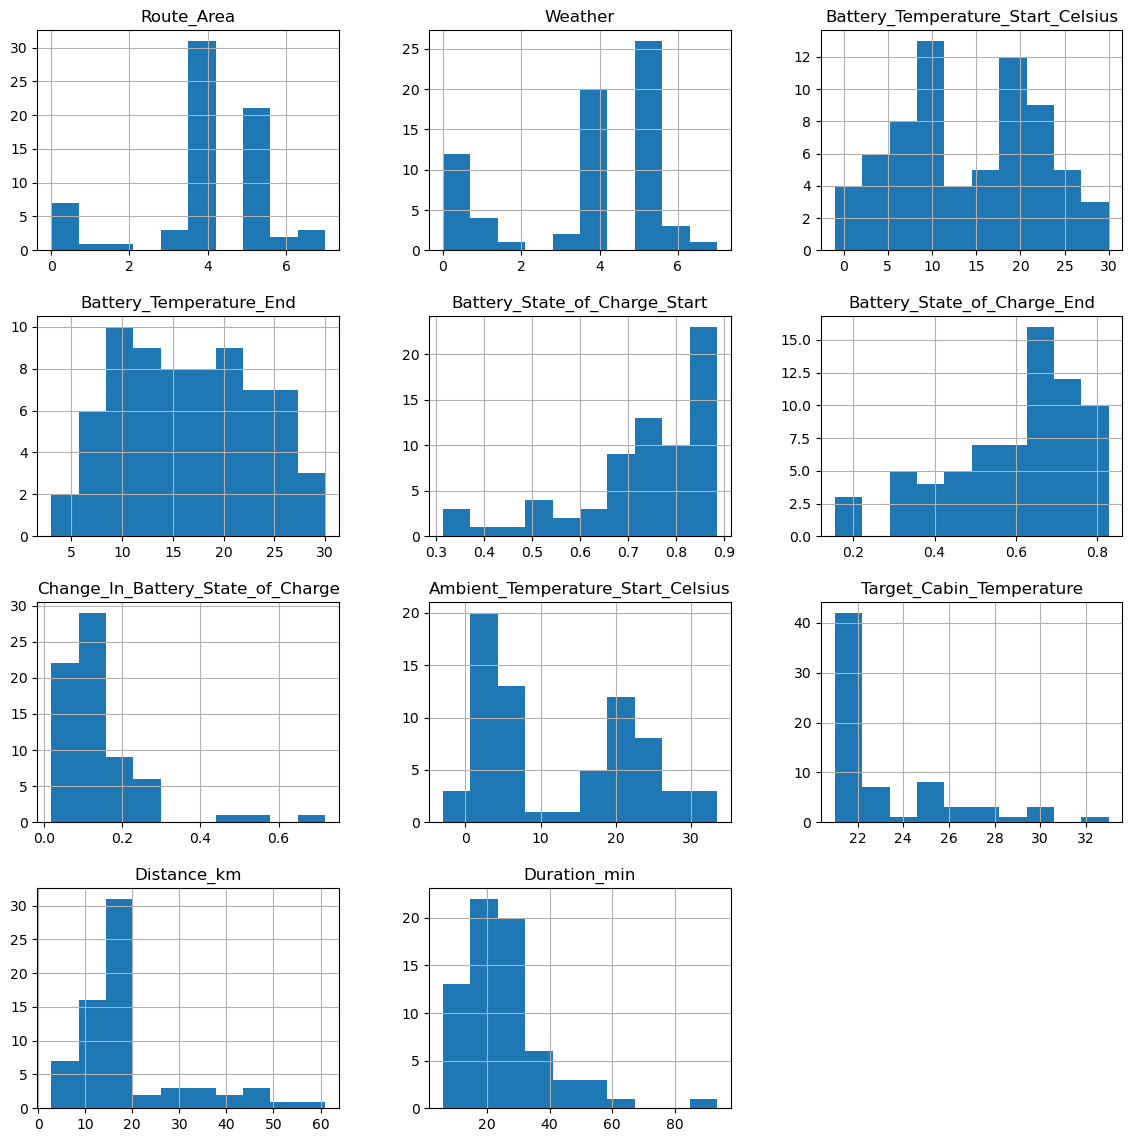

In [25]:
# Creating histograms
evbattemp.hist(figsize=(14,14))
plt.show()

**Observations:**

- **Route_Area** 4 and 5 have the most values that are associated in the data set.

- **Weather** 4 and 5 have the most values that are associated in the data set.

- **Battery_Temperature_Start_Celsius** has a bimodal distribution.

- **Battery_Temperature_End** has a uniform distribution.

- **Battery_State_of_Charge_Start** is leftly skewed.

- **Battery_State_of_Charge_End** is also leftly skewed and shows that not much energy from the battery is being drained during travel. 

- **Change_In_Battery_State_of_Charge** is rightly skewed and with a small standard deviation, this confirms not much energy from battery is being used during travel.

- **Ambient_Temperature_Start_Celsius** has a bimodal distribution.

- **Target_Cabin_Temperature** is leftly skewed. 

- **Distance_km** has normal distribution and most distance travel is 20KM or less.

- **Duration_min** is leftly skewed with most duration of travel less than 40 minutes.

### **Univariate analysis for categorical variables**

In [26]:
# Printing the % sub categories of each category
for i in ordinal_cols:
    print(evbattemp[i].value_counts(normalize=True))
    print('*'*40)

4.0    0.449275
5.0    0.304348
0.0    0.101449
7.0    0.043478
3.0    0.043478
6.0    0.028986
1.0    0.014493
2.0    0.014493
Name: Route_Area, dtype: float64
****************************************
5.0    0.376812
4.0    0.289855
0.0    0.173913
1.0    0.057971
6.0    0.043478
3.0    0.028986
2.0    0.014493
7.0    0.014493
Name: Weather, dtype: float64
****************************************


### **Bivariate and Multivariate analysis**
We have analyzed different categorical variables. Let's now check how does Battery_Temperature_End rate is related with the 2 categorical variables.

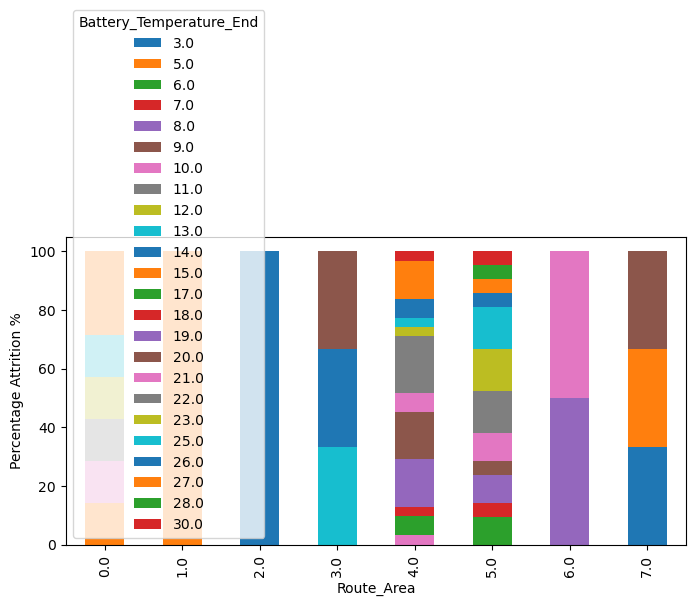

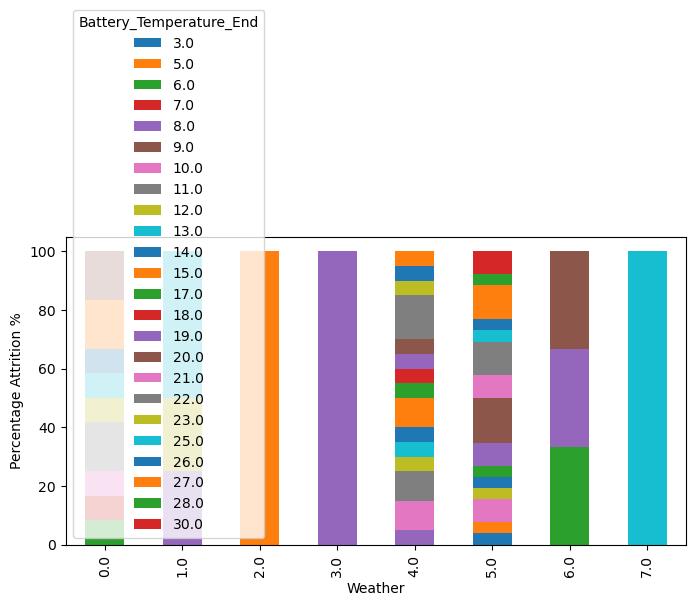

In [27]:
ordinal_cols_with_end_bat_temp = ['Route_Area','Weather','Battery_Temperature_End']
for i in ordinal_cols_with_end_bat_temp:
    if i!='Battery_Temperature_End':
        (pd.crosstab(evbattemp[i],evbattemp['Battery_Temperature_End'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Attrition %')

### **Let's check the relationship between different numerical variables**

<AxesSubplot:>

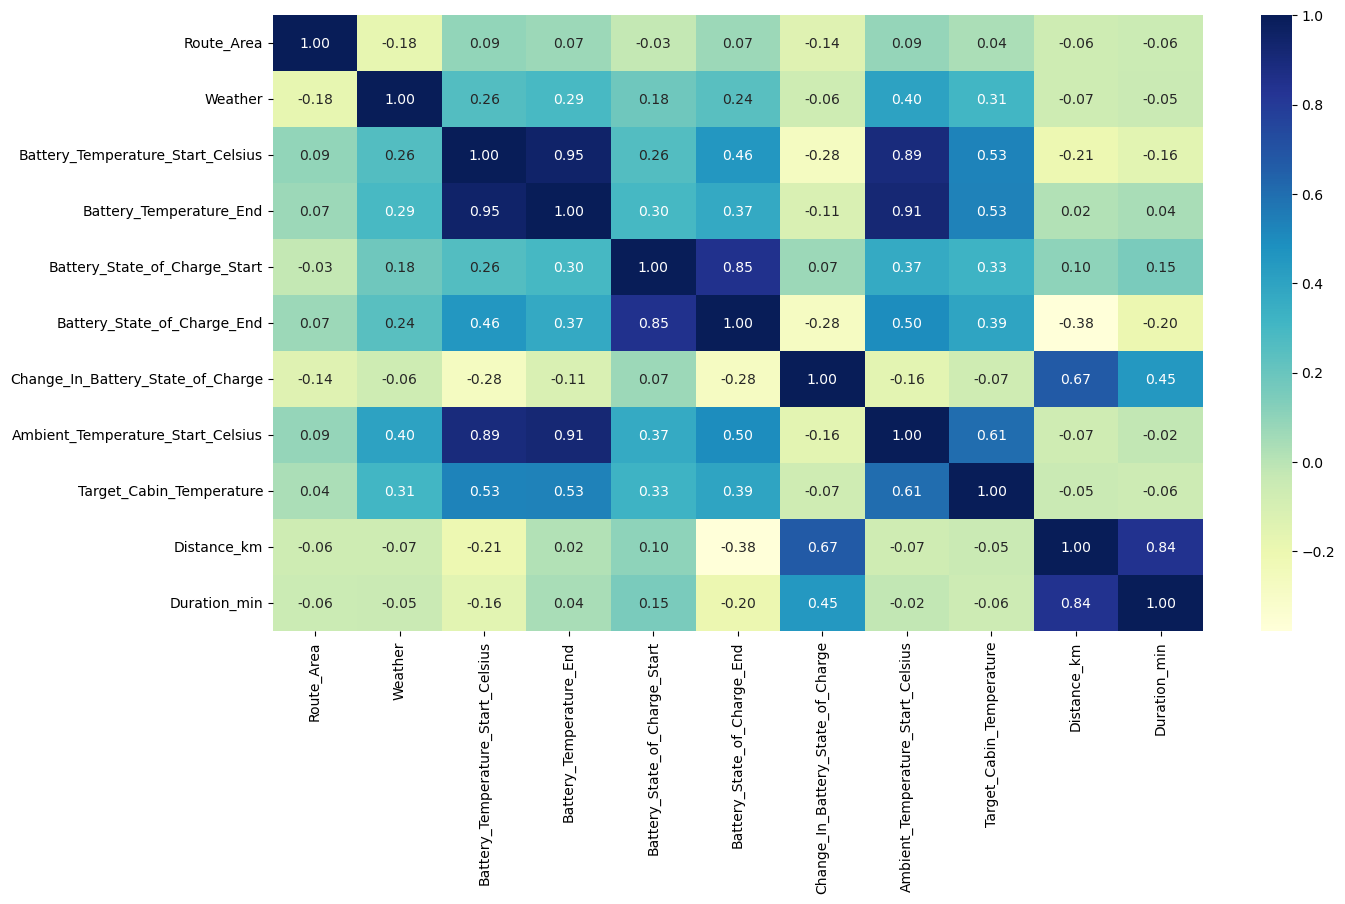

In [28]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(evbattemp.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- The listed columns have the strongest relationship to column "Battery_Temperature_End" in the following order: **Battery_Temperature_Start_Celsius, Ambient_Temperature_Start_Celsius, Target_Cabin_Temperature, Battery_State_of_Charge_End, Battery_State_of_Charge_Start, Weather** which is easy to understand as these variables show an increase with "Battery_Temperature_Start_Celsius" showing the closest relationship to "Battery_Temperature_End". 
- Columns "Route_Area" and "Distance_km" have the lowest correllation with "Battery_Temperature_End".
- The question relates about distance but we need to remove it as there is no relationship.
- Since column "Battery_Temperature_Start_Celsius" is so strongly related, we may need to actually combine the values of "Battery_Temperature_Start_Celsius" and "Battery_Temperature_End" and get the average between the 2 values and perform the Exploratory Data Analysis again before trying to determine which values are closely related to allow for model selection.
- Also combine columns "Battery_State_of_Charge_Start" and "Battery_State_of_Charge_End" and use their average as well. because we can see that column "Change_In_Battery_State_of_Charge" has no correllation to "Battery_Temperature_End."

### **Due to findings in the analysis from the Heat Map, Combine both "Battery Temp" Columns and use the Average as well as Combine "Battery Charge" and use the average with them as well**

In [29]:
# make a copy of the original data set
evbattemp_old = evbattemp

In [30]:
# add the column to combine the values for battery temp. (start and end)
evbattemp['Avg_Battery_Temperature_Combined_Celsius'] = (evbattemp['Battery_Temperature_Start_Celsius'] + evbattemp['Battery_Temperature_End'])/2

In [31]:
# drop the columns "Battery_Temperature_Start_Celsius" and "Battery_Temperature_End"
evbattemp = evbattemp.drop(['Battery_Temperature_Start_Celsius','Battery_Temperature_End'], axis=1)

In [32]:
# add the column to combine the values for battery charge. (start and end)
evbattemp['Avg_Battery_State_of_Charge_Combined'] = (evbattemp['Battery_State_of_Charge_Start'] + evbattemp['Battery_State_of_Charge_End'])/2

In [33]:
# drop the columns "'Battery_State_of_Charge_Start" and "Battery_Temperature_End"
evbattemp = evbattemp.drop(['Battery_State_of_Charge_Start','Battery_State_of_Charge_End'], axis=1)

In [34]:
# review the data set with the "avg battery temp" added
evbattemp.head()

,Route_Area,Weather,Change_In_Battery_State_of_Charge,Ambient_Temperature_Start_Celsius,Target_Cabin_Temperature,Distance_km,Duration_min,Avg_Battery_Temperature_Combined_Celsius,Avg_Battery_State_of_Charge_Combined
0,4.0,5.0,0.060,25.5,23.0,7.427690,16.820000,21.5,0.8330
1,4.0,5.0,0.130,32.0,23.0,23.509709,23.550000,24.5,0.7380
2,4.0,5.0,0.084,21.5,27.0,12.820846,11.180000,24.5,0.7930
3,4.0,5.0,0.084,24.0,22.0,10.727491,6.870000,26.0,0.7090
4,4.0,5.0,0.065,24.5,24.0,12.393223,22.776667,27.0,0.6345


### **Check the relationship between different numerical variables again after changes made**

<AxesSubplot:>

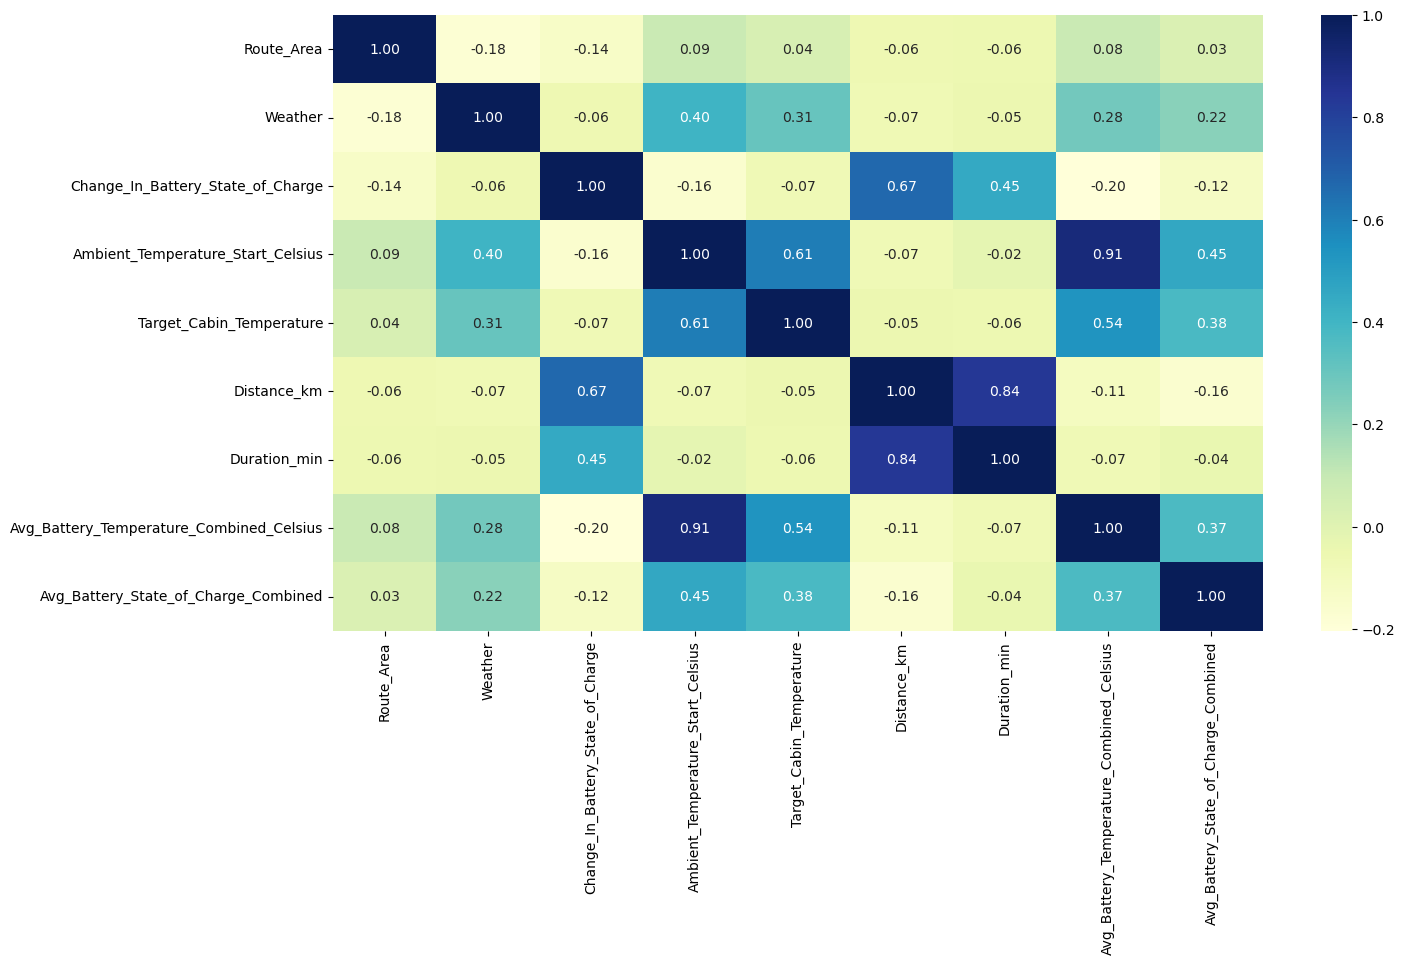

In [35]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(evbattemp.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- The listed columns have the strongest relationship to column "Avg_Battery_Temperature_Combined_Celsius" in the following order: **Ambient_Temperature_Start_Celsius, Target_Cabin_Temperature, Avg_Battery_State_of_Charge_Combined, and Weather** which is easy to understand as these variables show an increase with "Ambient_Temperature_Start_Celsius" showing the closest relationship to "Avg_Battery_Temperature_Combined_Celsius".
- These 4 columns have been consistent with strongest correllation on "Battery Temperature" so we will use these for variables in model selection.
- Columns "Distance_km" and "Duration_min" still some of the weakest correllations to "Avg_Battery_Temperature_Combined_Celsius"

In [39]:
# Creating a new column with the transformed variable.
# will be used in the model selection stage
evbattemp['Avg_Battery_Temperature_Combined_Celsius_log'] = np.log(evbattemp['Avg_Battery_Temperature_Combined_Celsius'])

In [40]:
# review the data
evbattemp.head()

,Route_Area,Weather,Change_In_Battery_State_of_Charge,Ambient_Temperature_Start_Celsius,Target_Cabin_Temperature,Distance_km,Duration_min,Avg_Battery_Temperature_Combined_Celsius,Avg_Battery_State_of_Charge_Combined,Avg_Battery_Temperature_Combined_Celsius_log
0,4.0,5.0,0.060,25.5,23.0,7.427690,16.820000,21.5,0.8330,3.068053
1,4.0,5.0,0.130,32.0,23.0,23.509709,23.550000,24.5,0.7380,3.198673
2,4.0,5.0,0.084,21.5,27.0,12.820846,11.180000,24.5,0.7930,3.198673
3,4.0,5.0,0.084,24.0,22.0,10.727491,6.870000,26.0,0.7090,3.258097
4,4.0,5.0,0.065,24.5,24.0,12.393223,22.776667,27.0,0.6345,3.295837


### **Drop weak correllated columns from the data set**

In [36]:
# drop the columns "'Route_Area','Change_In_Battery_State_of_Charge','Distance_km', 'Duration_min'"
# Not going to drop these columns, let the model analysis prove they are not need as per the observation
# evbattemp = evbattemp.drop(['Route_Area','Change_In_Battery_State_of_Charge','Distance_km', 'Duration_min'], axis=1)

In [37]:
# review the data set after weak correllated data removed
# Not going to drop these columns, let the model analysis prove they are not need as per the observation
#evbattemp.head()

## **Proposed approach**

--------------------
### **Potential techniques** :
--------------------
Since it is a regression problem we will first start with the parametric model - linear regression and Ridge Regression. 

-------------------
### **Overall solution design** : 
---------------------
The potential solution design would look like this:
* Checking the data description to get the idea of basic statistics or summary of data.
* Univariate analysis to see how data is spread out, getting to know about the outliers.
* Bivariate analysis to see how different attributes vary with the dependent variable.
* Outlier treatment if needed - In this case, outlier treatment is not necessary as outliers are the higher battery temps and in real-world scenarios, such battery temperatures would appear in data and we would want our predictive model to capture the underlying pattern for them.
* Missing value treatment using appropriate techniques.
* Feature engineering - transforming features, creating new features if possible.
* Choosing the model evaluation technique - 1) R Squared 2) RMSE can be any other metrics related to regression analysis.
* Splitting the data and proceeding with modeling.
* Model tuning to see if the performance of the model can be improved further.

-----------------
### **Measures of success** :
-----------------
R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.

-------------------
### **Model Building**
------------------
1. What we want to predict is the "Avg_Battery_Temperature_Combined_Celsius". We will use the normalized version 'Avg_Battery_Temperature_Combined_Celsius_log' for modeling.
2. Before we proceed to the model, we'll confirm if we have to encode categorical features. We will drop categorical features like "Weather". We made this change in the Data Preparation stage. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.


#### **Define dependent and independent variables**

In [44]:
independent_evbattemp_vars = evbattemp.drop(['Avg_Battery_Temperature_Combined_Celsius', 'Avg_Battery_Temperature_Combined_Celsius_log'], axis = 1)
dependent_evbattemp_var = evbattemp[['Avg_Battery_Temperature_Combined_Celsius_log', 'Avg_Battery_Temperature_Combined_Celsius']]

#### **Split the data into train and test**

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    independent_evbattemp_vars, dependent_evbattemp_var, test_size = 0.3, random_state = 1
)

In [46]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 48
Number of rows in test data = 21


### **Fitting a linear model - Linear Regression**
Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [47]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["Avg_Battery_Temperature_Combined_Celsius_log"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                                         OLS Regression Results                                         
Dep. Variable:     Avg_Battery_Temperature_Combined_Celsius_log   R-squared:                       0.758
Model:                                                      OLS   Adj. R-squared:                  0.709
Method:                                           Least Squares   F-statistic:                     15.31
Date:                                          Sat, 11 Feb 2023   Prob (F-statistic):           7.03e-10
Time:                                                  22:50:41   Log-Likelihood:                -13.192
No. Observations:                                            48   AIC:                             44.38
Df Residuals:                                                39   BIC:                             61.22
Df Model:                                                     8                                         
Covariance Type:                                      n

* Both the R-squared and Adjusted R squared of our model is not that high. We will have to comfirm this model.
* It is very possible with limited amount of data (total of 69 records) is causing the model to be an underfitting model.
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
* Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [48]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(model, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = model.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Avg_Battery_Temperature_Combined_Celsius"]

    # Prediction on test data
    y_pred_test_pricelog = model.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Avg_Battery_Temperature_Combined_Celsius"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, x_train, x_test)  # High Overfitting.

    Data      RMSE       MAE       MAPE
0  Train  3.318912  2.754549  25.525614
1   Test  4.481597  3.803759  36.478741


* Root Mean Squared Error of train and test data has a slight difference, indicating that our model is mostly fine but probaby underfitting the train data. 
* Mean Absolute Error indicates that our current model can predict used "Avg_Battery_Temperature_Combined_Celsius" within a mean error of 3.8 temperature Celsius on test data.
* The units of both RMSE and MAE are the same - temperature Celsius in this case. But RMSE is greater than MAE because it penalizes the outliers more.
* Mean Absolute Percentage Error is ~36% on the test data.

**Checking the Linear Regression Assumptions**

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

**Checking Assumption 1: No Multicollinearity**

- We will use VIF, to check if there is multicollinearity in the data.

- Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(x_train))

                                feature         VIF
0                                 const  116.093892
1                            Route_Area    1.100607
2                               Weather    1.362602
3     Change_In_Battery_State_of_Charge    1.682947
4     Ambient_Temperature_Start_Celsius    1.791772
5              Target_Cabin_Temperature    1.443086
6                           Distance_km    5.004547
7                          Duration_min    3.756241
8  Avg_Battery_State_of_Charge_Combined    1.595754


- only one column that matches this and I am not concerned about it
- confirms the "Distance_km" is not needed in the prediction, but not bad enough to remove it as it is right on the threshold

#### **Checking Assumption 2: Mean of residuals should be 0**

In [51]:
residuals = olsmodel1.resid
np.mean(residuals)

-2.840320571332692e-15

- Mean of redisuals is very close to 0. The second assumption is also satisfied.

#### **Checking Assumption 3: No Heteroscedasticity**

* Homoscedacity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

We'll use **`Goldfeldquandt Test`** to test the following hypothesis

> **Null hypothesis: Residuals are homoscedastic**

> **Alternate hypothesis: Residuals have heteroscedasticity**

> **alpha = 0.05** 

In [52]:
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 2.528412075767691), ('p-value', 0.04120230509271213)]

- Since the p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic. 

- Assumptions 3 is also satisfied by our olsmodel1.

**Checking Assumption 4: Linearity of variables**

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

In [66]:
# Predicted values
fitted = olsmodel1.fittedvalues
#print(fitted)
#print(residuals)
fitted_residuals = pd.DataFrame
fitted_residuals['fitted'].astype('float64') = fitted[1]
fitted_residuals['residuals'].astype('float64') = residuals[1]
# sns.set_style("whitegrid")
sns.residplot(fitted_residuals,x='fitted', y='residuals', color = "purple", lowess = True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

SyntaxError: cannot assign to function call (3519848622.py, line 6)

#### **Checking Assumption 5: Normality of error terms**

The residuals should be normally distributed.

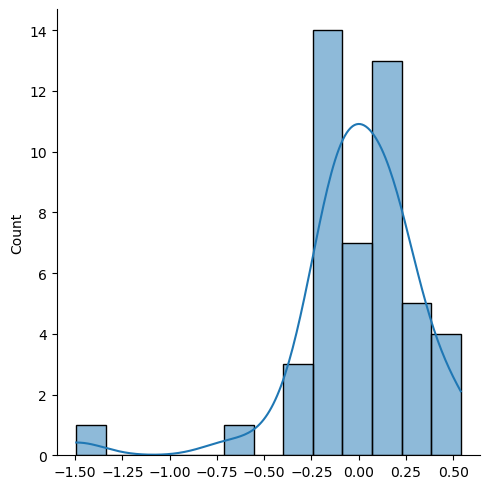

In [68]:
# Plot histogram of residuals
sns.displot(residuals, kde=True)

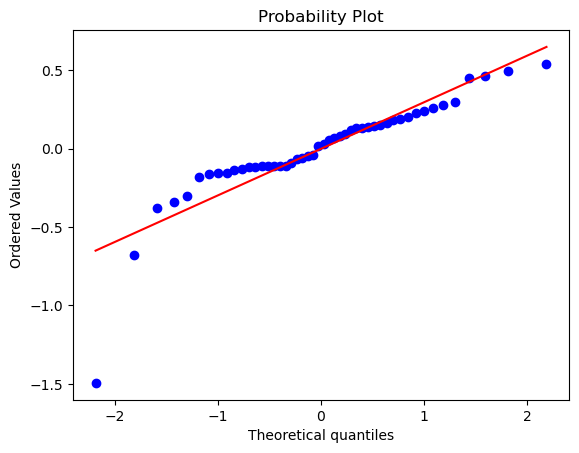

In [69]:
# Plot q-q plot of residuals
import pylab


scipy.stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

- The residuals have a close to normal distribution. Assumption 5 is also satisfied.
- We should further investigate these values in the tails where we have made huge residual errors.

**Now that we have seen that olsmodel1 follows all the linear regression assumptions. Let us use that model to draw inferences.**

In [70]:
print(olsmodel1.summary())

                                         OLS Regression Results                                         
Dep. Variable:     Avg_Battery_Temperature_Combined_Celsius_log   R-squared:                       0.758
Model:                                                      OLS   Adj. R-squared:                  0.709
Method:                                           Least Squares   F-statistic:                     15.31
Date:                                          Sat, 11 Feb 2023   Prob (F-statistic):           7.03e-10
Time:                                                  23:45:06   Log-Likelihood:                -13.192
No. Observations:                                            48   AIC:                             44.38
Df Residuals:                                                39   BIC:                             61.22
Df Model:                                                     8                                         
Covariance Type:                                      n

#### **Observations from the model**

to tired,  will do it later

In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Import methods to build linear model for statistical analysis and prediction

from sklearn.tree import DecisionTreeRegressor                   # Import methods to build decision trees.
from sklearn.ensemble import RandomForestRegressor               # Import methods to build Random Forest.

from sklearn import metrics                                      # Metrics to evaluate the model

from sklearn.model_selection import GridSearchCV                 # For tuning the model

In [99]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag = True):
    """
    model : regressor to predict values of X

    """
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Avg_Battery_Temperature_Combined_Celsius'], pred_train_)
    test_r2 = metrics.r2_score(y_test['Avg_Battery_Temperature_Combined_Celsius'], pred_test_)
    train_rmse = metrics.mean_squared_error(
        y_train['Avg_Battery_Temperature_Combined_Celsius'], pred_train_, squared = False
    )
    test_rmse = metrics.mean_squared_error(y_test['Avg_Battery_Temperature_Combined_Celsius'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print(
            'R-sqaure on training set : ',
            metrics.r2_score(y_train['Avg_Battery_Temperature_Combined_Celsius'], pred_train_),
        )
        print('R-square on test set : ', metrics.r2_score(y_test['Avg_Battery_Temperature_Combined_Celsius'], pred_test_))
        print(
            'RMSE on training set : ',
            np.sqrt(metrics.mean_squared_error(y_train['Avg_Battery_Temperature_Combined_Celsius'], pred_train_)),
        )
        print(
            'RMSE on test set : ',
            np.sqrt(metrics.mean_squared_error(y_test['Avg_Battery_Temperature_Combined_Celsius'], pred_test_)),
        )

    # Returning the list with train and test scores
    return score_list

### **Ridge Regression**
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [100]:
# Create a Ridge regression model
rdg = Ridge()

In [101]:

# split a new data set
X_train, X_test, y_train, y_test = train_test_split(
    independent_evbattemp_vars, dependent_evbattemp_var, test_size = 0.3, random_state = 1
)

In [84]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])
print(y_test)

Number of rows in train data = 48
Number of rows in test data = 21
Number of rows in train data = 48
Number of rows in test data = 21
    Avg_Battery_Temperature_Combined_Celsius_log  \
66                                      2.442347   
31                                      3.157000   
26                                      3.044522   
39                                      2.484907   
68                                      2.484907   
50                                      2.639057   
38                                      2.351375   
59                                      2.602690   
52                                      1.945910   
2                                       3.198673   
41                                      2.140066   
51                                      1.504077   
36                                      2.351375   
56                                      2.079442   
27                                      2.917771   
64                                

In [102]:
# Fit Ridge regression model.
rdg.fit(X_train, y_train['Avg_Battery_Temperature_Combined_Celsius_log'])

Ridge()

In [103]:
# Get score of the model.
Ridge_score = get_model_score(rdg)

R-sqaure on training set :  0.7946808727506741
R-square on test set :  0.3168814459663365
RMSE on training set :  3.316220233803461
RMSE on test set :  4.3802034583102


**Observations**
- Ridge regression is able to produce better results compared to Linear Regression.

### **Decision Tree**
https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [104]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state = 1)

In [105]:
# Fit decision tree regression model.
dtree.fit(X_train, y_train['Avg_Battery_Temperature_Combined_Celsius_log'])

DecisionTreeRegressor(random_state=1)

In [106]:
# Get score of the model.
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  1.0
R-square on test set :  0.2383134183755854
RMSE on training set :  2.4866682679399128e-15
RMSE on test set :  4.6252413064463065


**Observations**
- Decision Tree is overfitting on the training set and hence not able to generalize well on the test set.

Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance** )

In [108]:
print(
    pd.DataFrame(
        dtree.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                           Imp
Ambient_Temperature_Start_Celsius     0.779767
Duration_min                          0.129361
Avg_Battery_State_of_Charge_Combined  0.035672
Weather                               0.023816
Change_In_Battery_State_of_Charge     0.021585
Route_Area                            0.004216
Distance_km                           0.003700
Target_Cabin_Temperature              0.001883


**Observations**
- Ambient_Temperature_Start_Celsius, Duration_min and Avg_Battery_State_of_Charge_Combined are the top 3 important features of decision tree model.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [109]:
# Create a Random Forest regression model 
rf = RandomForestRegressor(random_state = 1, oob_score = True)

In [110]:
# Fit Random Forest regression model.
rf.fit(X_train, y_train['Avg_Battery_Temperature_Combined_Celsius_log'])

RandomForestRegressor(oob_score=True, random_state=1)

In [111]:
# Get score of the model.
RandomForest_model = get_model_score(rf)

R-sqaure on training set :  0.952054349777845
R-square on test set :  0.6227688095183581
RMSE on training set :  1.6025192917029607
RMSE on test set :  3.254992859505568


**Observations**
- Random Forest model has performed well on training and test set and we can see the model has overfitted slightly.

**Feature Importance**

Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance** )

In [112]:
print(
    pd.DataFrame(
        rf.feature_importances_, columns = ["Imp"], index = X_train.columns
    ).sort_values(by = "Imp", ascending = False)
)

                                           Imp
Ambient_Temperature_Start_Celsius     0.824506
Route_Area                            0.036535
Weather                               0.029758
Duration_min                          0.029041
Avg_Battery_State_of_Charge_Combined  0.026978
Distance_km                           0.026956
Change_In_Battery_State_of_Charge     0.023699
Target_Cabin_Temperature              0.002529


**Observations**
- Ambient_Temperature_Start_Celsius, Route_Area and Weather are the top 3 important features of decision tree model.